# Analisis de Datos del Grupo G
## Universidad de Flores y Universidad de Villa María



In [35]:
#Realizamos los imports necesarios

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
#Colocamos el nombre de las universidades en dos variables
#Para una futura reutilización del codigo

university1 = 'GrupoA_flores_universidad'
university1_name = 'Universidad de Flores'

university2 = 'GrupoA_villa_maria_universidad'
university2_name = 'Universidad de Villa María'



In [24]:
df_1 = pd.read_csv(f'../../datasets/{university1}_process.txt', sep='\t')
df_2 = pd.read_csv(f'../../datasets/{university2}_process.txt', sep='\t')

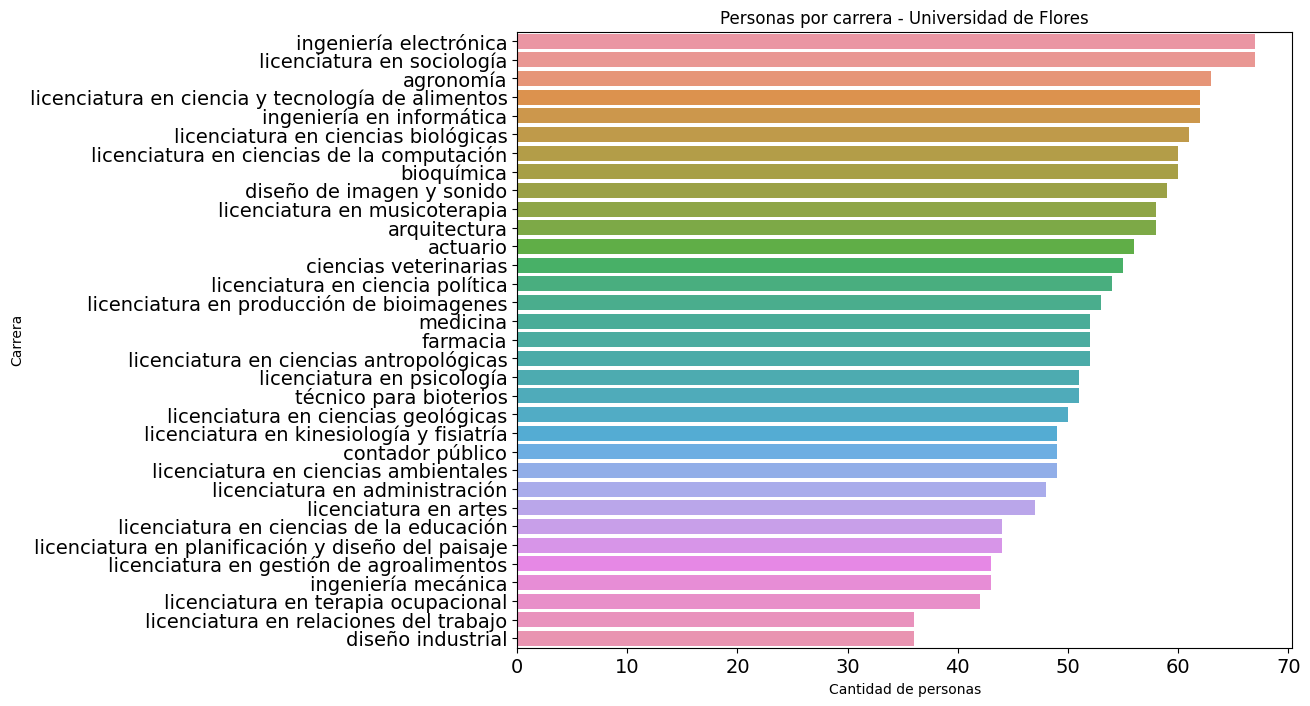

In [88]:
df_aux = df_1.groupby('career').count().reset_index().sort_values('university', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(data=df_aux, x='university', y='career')

plt.title(f'Personas por carrera - {university1_name}')
plt.xlabel('Cantidad de personas')
plt.ylabel('Carrera')

plt.show()

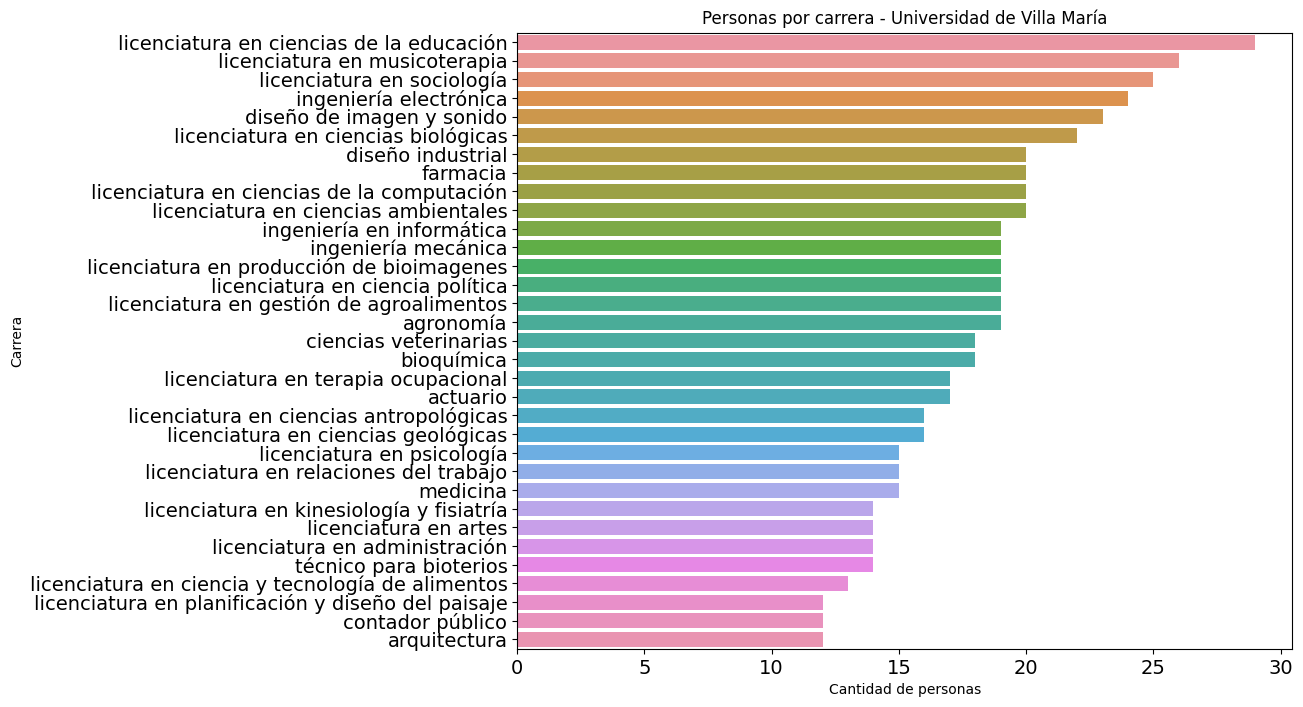

In [87]:
df_aux = df_2.groupby('career').count().reset_index().sort_values('university', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(data=df_aux, x='university', y='career')

plt.title(f'Personas por carrera - {university2_name}')
plt.xlabel('Cantidad de personas')
plt.ylabel('Carrera')

plt.show()